![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

### Introduction to Data Science with Python — Starter Pass

# Predicting heart diseases

In this project, you will be using a dataset from a cardiovascular study on residents of the town of Framingham, Massachusetts. This dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

The goal of this project **predict whether the patient has 10-year risk of future coronary heart disease (CHD)**. To do that you will need to put in practice all the topics you saw on previous lessons.

![heart](https://user-images.githubusercontent.com/7065401/103839631-9583ce80-506e-11eb-87fe-3ebf2a7a0be8.png)

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Knowing our data

Before starting it's important to load all the libraries we'll be using and understand the data we'll be working on.

---
### Attributes

#### Demographic

- Sex: male or female
- Age: Age of the patient
- Education: no further information provided

#### Behavioral

- Current Smoker: whether or not the patient is a current smoker
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day

#### Information on medical history
- BP Meds: whether or not the patient was on blood pressure medication
- Prevalent Stroke: whether or not the patient had previously had a stroke
- Prevalent Hyp: whether or not the patient was hypertensive
- Diabetes: whether or not the patient had diabetes

#### Information on current medical condition
- Tot Chol: total cholesterol level
- Sys BP: systolic blood pressure
- Dia BP: diastolic blood pressure
- BMI: Body Mass Index
- Heart Rate: heart rate - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.
- Glucose: glucose level

#### Target variable to predict
- TenYearCHD: 10 year risk of coronary heart disease (binary: “1:Yes”, “0:No”)


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('data/heart.csv')

Take a look at some records of your data, analyze columns and values:

In [16]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [18]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Dealing with missing values

Check if there is any missing value on the data.

> In that case remove the rows with missing values. An advanced approach could be imputting values or removing insignificant columns with more than 30% of missing values.

In [19]:
df.isnull().sum()
df.dropna(inplace=True)

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Correlation analysis

Plot a heatmap showing correlation between variables.

Text(0.5, 1.0, 'Correlation Matrix')

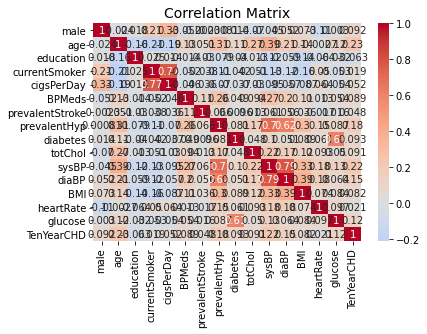

In [20]:
ax = sns.heatmap(df.corr(), center=0, cmap="coolwarm", annot=True)
ax.set_title(u"Correlation Matrix", fontsize=14)

---
### Have you detected any high correlated variables?

If yes remove one of them to avoid collinearity.

In [21]:
df.drop(['sysBP', 'diaBP', 'glucose'], axis=1, inplace=True)

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Features and Labels

Assign to the `X` variable your features, and to the `y` variable your labels.

In [22]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Standardization

As the `X` features aren't on the same scale, let's standardize them.

To do that use the `StandardScaler` from scikit-learn.

In [23]:
from sklearn.preprocessing import StandardScaler

std_scr = StandardScaler()
X = std_scr.fit_transform(X)


![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Train and test splits

Let's split the `X` and `y` data into training and testing sets.

Keep 80% of the data in the training set and 20% of the data in the test set.

> You can use a `random_state` to reproduce your problem the same every time it is run.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## My first model

Now you will need to create a model to make predictions. In this case you will need to create a `LogisticRegression` classifier:

1. Create the classifier `clf` model.
2. Fit/train that model with your `X_train` and `y_train` data.
3. Get the predictions of that model over your `X_test` set.
4. Get the score of that model using your `X_test` and `y_test` data.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# create model
clf = LogisticRegression(random_state=123)

# fit/train model
clf.fit(X_train, y_train)

# get predictions
y_pred = clf.predict(X_test)

# show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get model score
clf.score(X_test, y_test)


[[614   5]
 [105   8]]


0.8497267759562842

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Other classifiers

scikit-learn offers a lot of methods/algorithms for this type of problems. Are we sure that the `LogisticRegression` classifier we used is the best model?

Let's try other methods/algorithms to see if any of them can achieve a better score.

> You can try a `RandomForestClassifier`, a `DecisionTreeClassifier`, a `LinearSVC`, or any other classifier from scikit-learn.


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

# create model
clr = RandomForestClassifier(random_state=123)
cld = DecisionTreeClassifier(random_state=123)
clv = LinearSVC(random_state=123)

# fit/train model
clr.fit(X_train, y_train)
cld.fit(X_train, y_train)
clv.fit(X_train, y_train)

# get predictions
y_pred1 = clr.predict(X_test)
y_pred2 = cld.predict(X_test)
y_pred3 = clv.predict(X_test)

# show confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm)

# get model score
clf.score(X_test, y_test)


[[614   5]
 [105   8]]


0.8497267759562842

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)